In [159]:
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt
from scipy import signal
from MRPy import MRPy
import pandas as pd
import scipy.stats as st
import gzip   as gz
from scipy.signal import find_peaks

Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de P√≥s-Gradua√ß√£o em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering


### Trabalho Final: Shear Building

[1.    Introdu√ß√£o](#section_1)  
[2.    Modelo Reduzido](#section_2)  
[2.1   Propriedades do Modelo](#section_21)  
[2.1.1 Geometria e Material](#section_211)  
[2.2.2 Shear Building](#section_222)  
[2.2   Frequ√™ncias e Modos de Vibra√ß√£o](#section_22)  
[3.    Modelo Real](#section_3)  
[3.1   Propriedades do Modelo](#section_31)  
[3.1.1 Geometria e Material](#section_311)  
[3.2.2 Shear Building](#section_322)  
[3.2   Frequ√™ncias e Modos de Vibra√ß√£o](#section_32)  
[4.    Excita√ß√£o Harm√¥nica](#section_4)  
[4.1   Materiais Utilizados](#section_4.1)  
[4.2.1 Raspberry Pi Zero](#section_421)  
[4.2.2 Servo](#section_422)  
[4.2.3 Aceler√¥metro](#section_423)  
[4.3   Ensaios](#section_43)  
[4.3.1 Frequ√™ncia natural do modelo reduzido](#section_431)  
[4.3.2 Velocidade angular do servo](#section_432)  
[4.4   Desenvolvimento do C√≥digo](#section_44)  
[5.    An√°lise Estat√≠stica](#section_5)  


---
_Fl√°vio Ant√¥nio Ferreira, Doutorando_   
_Jos√© Lucas Silva Borges, Mestrando_    
_Porto Alegre, RS, Brazil_ 


## 1. Introdu√ß√£o <a name="section_1"></a> 

Este trabalho no consiste no ensaio de um modelo reduzido existente, feito em a√ßo, que representa um Shear Building de 2 pavimentos, onde ser√° utilizado um servo-motor para excitar a estrutura em sua frequ√™ncia natural. Na sequencia ser√£o realizados os c√°lculos de uma estrutura real em concreto armado que poderia ser representada por esse modelo.

## 2. Modelo Real <a name="section_2"></a> 

### 2.1 Propriedades do Modelo <a name="section_21"></a>

### 2.1.1 Geometria e Material <a name="section_211"></a>  
O modelo real √© dotado das seguintes caracter√≠sticas:

* Dimens√µes das Colunas:    
  $B \times H = 5 \times 20 {\rm mm}$  
* Altura das Colunas:    
  $L_{\rm 1} = 160  {\rm mm}$    
* Propriedades da Se√ß√£o Transversal:    
  $A = 10{\rm mm}^2$ e $I = 208,3 \times 10^{-3}{\rm mm}^4$ <br>
* Peso Espec√≠fico do A√ßo:    
  $\rho_{\rm s} = 7850 {\rm kg/m}^3$    
* M√≥dulo de Elasticidade do A√ßo:    
  $E_{\rm s} = 205 \times 10^{9} {\rm N/m}^2$ 
* Rigidez √† flex√£o:   
  $E_{\rm s}\times I = 4.27 \times 10^{-2} Nm^2 $
* Massa do Pavimento Superior:    
  $m_{\rm 1} = 114  {g}$ 
* Massa do Pavimento Inferior:    
  $m_{\rm 2} = 104  {g}$ 

<img src="resources/shear building1.png" alt="sag_tension" width="480px"/>
<img src="resources/shear building2.png" alt="sag_tension" width="480px"/>


### 2.1.2 Shear Building <a name="section_212"></a>  

<img src="resources/shear building1.png" alt="sag_tension" width="480px"/>
<img src="resources/shear building2.png" alt="sag_tension" width="480px"/>


### 2.2 Frequ√™ncias e Modos de Vibra√ß√£o <a name="section_22"></a>  



### Par√¢metros Iniciais

In [21]:
#PILARRES
Ec=30*10**9
L = 4
h = 0.15
b = 0.220480598
Ip = (b*h**3)/12

Ir = 2*Ip
EIr = Ec*Ir

k  = 12*EIr/L/L/L

m1 = 30000
m2 = m1*.821825125

### Matrizes de Rigidez e Massa

In [22]:
# Stiffness coefficients in N/m
K = np.array ([[ 2*k, -2*k], 
               [-2*k,  4*k]])


# Lumped mass matrix in kg


M = np.array([ [m1,  0,], 
               [0,  m2,]])

print ("Matriz de rigidez\n",K)
print ("Matriz de Massa (lumped)\n",M)

Matriz de rigidez
 [[ 1395228.78421875 -1395228.78421875]
 [-1395228.78421875  2790457.5684375 ]]
Matriz de Massa (lumped)
 [[30000.          0.     ]
 [    0.      24654.75375]]


### C√°lculo das Frequ√™ncias e Modos de Vibra√ß√£o

First vibration mode:   0.69Hz, [ 0.858  0.514]
Second vibration mode:  1.89Hz, [-0.441  0.897]
First mode modal mass is:  28589.51kg
Second mode modal mass is: 25696.64kg


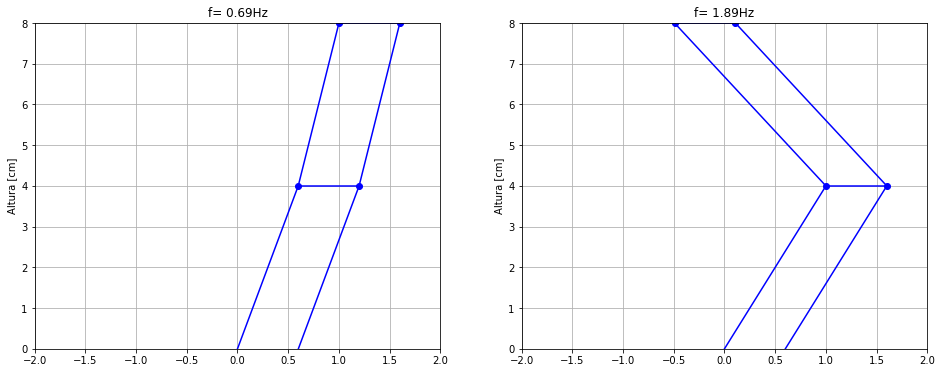

In [23]:
# Uses scipy to solve the standard eigenvalue problem
w2, Phi = sc.eig(K, M)

# Ensure ascending order of eigenvalues
iw  = w2.argsort()
w2  = w2[iw]
Phi = Phi[:,iw]

# Eigenvalues to vibration frequencies
wk  = np.sqrt(np.real(w2)) 
fk  = wk/2/np.pi

print('First vibration mode:  {0:5.2f}Hz, [{1:6.3f} {2:6.3f}]'.format(fk[0], *Phi[:,0]))
print('Second vibration mode: {0:5.2f}Hz, [{1:6.3f} {2:6.3f}]'.format(fk[1], *Phi[:,1]))

## Plotagem dos 3 primeiros modos de vibra√ß√£o da estrutura
plt.figure(1, figsize=(16,6))
x = np.linspace(0,2*L,3)

for k in range(2):
    pk = np.zeros(3)
    pk[1:] = Phi[::-1,k]
    pk /=np.max(np.abs(pk))
    plt.subplot(1,2,k+1)
    
    ## Linhas Horizontais
    for n in range(2):
        o = np.linspace(pk[n+1],pk[n+1]+.6,2)
        y1 = np.ones(2)*n*L+L
        plt.plot(o, y1, 'b')
    
    ## Pontos
    plt.plot(pk[1:],x[1:],'bo')
    plt.plot(pk[1:]+.6, x[1:], 'bo')
    
    ## Linhas Verticais
    plt.plot(pk,x,'b')
    plt.plot(pk+.6, x,'b')

    plt.xlim(-2, 2); plt.ylabel("Altura [cm]");
    plt.ylim( 0.0, 2*L+.01);
    plt.title('f= {0:3.2f}Hz'.format(fk[k]));
    plt.grid(True)
    
Mk = np.diag(np.dot(Phi.T, np.dot(M, Phi)))

print('First mode modal mass is:  {0:7.2f}kg'.format(Mk[0]))
print('Second mode modal mass is: {0:7.2f}kg'.format(Mk[1]))

## 2. Modelo Reduzido <a name="section_2"></a> 

### 2.1 Propriedades do Modelo <a name="section_21"></a>

### 2.1.1 Geometria e Material <a name="section_211"></a>  
O modelo reduzido a ser utilizado tem as seguintes caracter√≠sitcas:

* Dimens√µes das Colunas:    
  $B \times H = 5 \times 20 {\rm mm}$  
* Altura das Colunas:    
  $L_{\rm 1} = 160  {\rm mm}$    
* Propriedades da Se√ß√£o Transversal:    
  $A = 10{\rm mm}^2$ e $I = 208,3 \times 10^{-3}{\rm mm}^4$ <br>
* Peso Espec√≠fico do A√ßo:    
  $\rho_{\rm s} = 7850 {\rm kg/m}^3$    
* M√≥dulo de Elasticidade do A√ßo:    
  $E_{\rm s} = 205 \times 10^{9} {\rm N/m}^2$ 
* Rigidez √† flex√£o:   
  $E_{\rm s}\times I = 4.27 \times 10^{-2} Nm^2 $
* Massa do Pavimento Superior:    
  $m_{\rm 1} = 114  {g}$ 
* Massa do Pavimento Inferior:    
  $m_{\rm 2} = 104  {g}$ 

<img src="resources/shear building1.png" alt="sag_tension" width="480px"/>
<img src="resources/shear building2.png" alt="sag_tension" width="480px"/>


### 2.1.2 Shear Building <a name="section_212"></a>  

<img src="resources/shear building1.png" alt="sag_tension" width="480px"/>
<img src="resources/shear building2.png" alt="sag_tension" width="480px"/>


### 2.2 Frequ√™ncias e Modos de Vibra√ß√£o <a name="section_22"></a>  



### Par√¢metros Iniciais

In [174]:
L  = 0.16
#EI = 2.05e11*(0.02*0.0005**3)/12
EI = 0.71e11*((0.02*0.0006**3)/12)
k  = 12*EI/L/L/L

m1 = 0.12880952
m2 = 0.1058589

### Matrizes de Rigidez e Massa

In [175]:
# Stiffness coefficients in N/m
K = np.array ([[ 2*k, -2*k], 
               [-2*k,  4*k]])


# Lumped mass matrix in kg


M = np.array([ [m1,  0,], 
               [0,  m2,]])

print ("Matriz de rigidez\n",K)
print ("Matriz de Massa (lumped)\n",M)

Matriz de rigidez
 [[ 149.765625 -149.765625]
 [-149.765625  299.53125 ]]
Matriz de Massa (lumped)
 [[0.12880952 0.        ]
 [0.         0.1058589 ]]


### C√°lculo das Frequ√™ncias e Modos de Vibra√ß√£o

First vibration mode:   3.44Hz, [ 0.858  0.514]
Second vibration mode:  9.45Hz, [-0.441  0.897]
First mode modal mass is:     0.12kg
Second mode modal mass is:    0.11kg


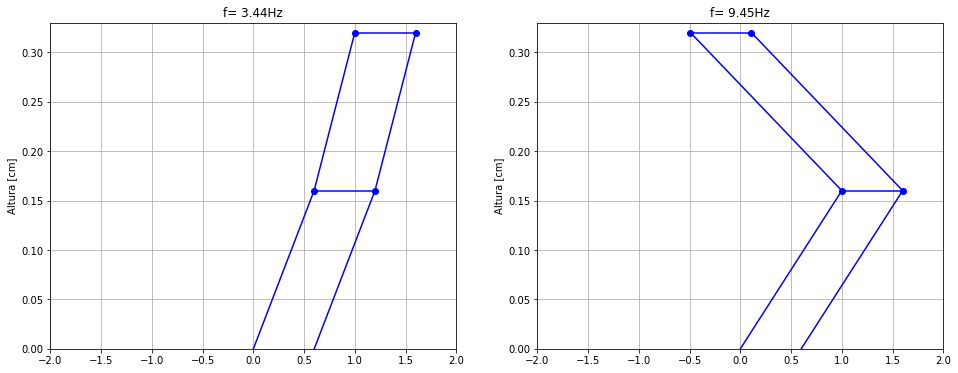

In [176]:
# Uses scipy to solve the standard eigenvalue problem
w2, Phi = sc.eig(K, M)

# Ensure ascending order of eigenvalues
iw  = w2.argsort()
w2  = w2[iw]
Phi = Phi[:,iw]

# Eigenvalues to vibration frequencies
wk  = np.sqrt(np.real(w2)) 
fk  = wk/2/np.pi

print('First vibration mode:  {0:5.2f}Hz, [{1:6.3f} {2:6.3f}]'.format(fk[0], *Phi[:,0]))
print('Second vibration mode: {0:5.2f}Hz, [{1:6.3f} {2:6.3f}]'.format(fk[1], *Phi[:,1]))

## Plotagem dos 3 primeiros modos de vibra√ß√£o da estrutura
plt.figure(1, figsize=(16,6))
x = np.linspace(0,2*L,3)

for k in range(2):
    pk = np.zeros(3)
    pk[1:] = Phi[::-1,k]
    pk /=np.max(np.abs(pk))
    plt.subplot(1,2,k+1)
    
    ## Linhas Horizontais
    for n in range(2):
        o = np.linspace(pk[n+1],pk[n+1]+.6,2)
        y1 = np.ones(2)*n*L+L
        plt.plot(o, y1, 'b')
    
    ## Pontos
    plt.plot(pk[1:],x[1:],'bo')
    plt.plot(pk[1:]+.6, x[1:], 'bo')
    
    ## Linhas Verticais
    plt.plot(pk,x,'b')
    plt.plot(pk+.6, x,'b')

    plt.xlim(-2, 2); plt.ylabel("Altura [cm]");
    plt.ylim( 0.0, 2*L+.01);
    plt.title('f= {0:3.2f}Hz'.format(fk[k]));
    plt.grid(True)
    
Mk = np.diag(np.dot(Phi.T, np.dot(M, Phi)))

print('First mode modal mass is:  {0:7.2f}kg'.format(Mk[0]))
print('Second mode modal mass is: {0:7.2f}kg'.format(Mk[1]))

## Modelo reduzido

In [24]:
# Importing pandas dataframe with dimension exponents for relevant quantities
DimData = pd.read_excel('resources/DimData.xlsx', sheet_name='DimData', index_col=0)
pi = np.pi;

In [25]:
ABC    = ['L', 'a', 'm']           
LMT    = ['L', 'M', 'T']           
base   =  DimData.loc[ABC, LMT]    
i_base =  np.linalg.inv(base)      

print(base)
#print(i_base)

   L  M  T
L  1  0  0
a  1  0 -2
m  0  1  0


In [26]:
Œª_L    =  1/25               # Escala de comprimento do modelo real
Œª_a    =  1/1                # Escala de acelera√ß√£o (gravidade)
Œª_m   =   128.880952/(30*10**6)        # Escala de massa

In [27]:
par    = ['f', 'EI', 'm', 'P']                    # selected scales to be calculated
npar   =  len(par)                           # number of quantities
DimMat =  DimData.loc[par, LMT]              # the dimensional matrix

print(DimMat)
#print(i_base)                               

    L  M  T
f   0  0 -1
EI  3  1 -2
m   0  1  0
P   2  1 -3


In [28]:
scales =  np.tile([Œª_L, Œª_a, Œª_m],(npar,1))  # prepare for calculations

NewMat = pd.DataFrame(data    = np.dot(DimMat, i_base),
                      index   = DimMat.index,
                      columns = ABC)
print(NewMat)

      L    a    m
f  -0.5  0.5  0.0
EI  2.0  1.0  1.0
m   0.0  0.0  1.0
P   0.5  1.5  1.0


In [29]:
[Œª_f, Œª_EI, Œª_m, Œª_P]  = np.prod(scales**NewMat, axis=1);

print('Escala de Frequencia:  Œª_f  = 1:{0:4.2f}'.format(1/Œª_f),  '\n'
      'Escala de Rigidez:     Œª_EI = 1:{0:4.10f}'.format(1/Œª_EI), '\n'
      'Escala de Massa:       Œª_m  = 1:{0:4.10f}'.format(1/Œª_m),  '\n'
      'Escala de Potencia:    Œª_P  = 1:{0:4.10f}'.format(1/Œª_P))

Escala de Frequencia:  Œª_f  = 1:0.20 
Escala de Rigidez:     Œª_EI = 1:145483096.6797948182 
Escala de Massa:       Œª_m  = 1:232772.9546876718 
Escala de Potencia:    Œª_P  = 1:1163864.7734383587


In [126]:
print('Massa do Pavimento:      {0:5.3f}kg'.format(m1*Œª_m))
print('Rigidez da Estrutura:    {0:5.10f}Nm¬≤'.format(EIr*Œª_EI))
print('Comprimento da Coluna:   {0:5.2f}m'.format(L*Œª_L))
fkr = fk*Œª_f
print('Primeira Frequencia:     {0:5.2f}Hz'.format(fkr[0]))
print('Segunda Frequencia:      {0:5.2f}Hz'.format(fkr[1]))

Massa do Pavimento:      0.000kg
Rigidez da Estrutura:    0.0255741744Nm¬≤
Comprimento da Coluna:    0.01m
Primeira Frequencia:      3.44Hz
Segunda Frequencia:       9.45Hz


### Constru√ß√£o do modelo

In [31]:
Ea=71*10**9
Ia=EIr*Œª_EI/Ea
b = 0.02
h = (12*Ia/b)**(1/3)
L = 0.16


m1 = 0.12880952
m2 = 0.1058589

Mr = np.array([ [m1,  0,], 
               [0,  m2,]])

### An√°lise de Propaga√ß√£o de Erro

In [32]:
m_e = [ 0.55, 0.60, 0.65, 0.60, 0.65, 0.60, 0.60, 0.65, 0.55, 0.6, 0.6, 0.6]        #espessura das colunas em mm
m_L = [20.60,20.40,20.90,21.00,20.70,20.70,20.30,20.10,20.20,20.4,20.3,20.3]   #largura das colunas mm

mi_e = np.mean(m_e)
sigma_e = np.std(m_e)

mi_L = np.mean(m_L)
sigma_L = np.std(m_L)

print('--------------------------------------------','\n',
      'Espessura m√©dia da coluna:           {0:5.5f}mm'.format(mi_e),'\n',
      'Desvio padr√£o da espessura:         {0:5.5f}mm'.format(sigma_e),'\n',
      'Largura m√©dia da coluna:            {0:5.5f}mm'.format(mi_L),'\n',
      'Desvio padr√£o da largura:          {0:5.5f}mm'.format(sigma_L),'\n',
      '--------------------------------------------')

-------------------------------------------- 
 Espessura m√©dia da coluna:           0.60417mm 
 Desvio padr√£o da espessura:         0.03200mm 
 Largura m√©dia da coluna:            20.49167mm 
 Desvio padr√£o da largura:          0.27221mm 
 --------------------------------------------


In [140]:
#----------------------------------#
Ea = 71*10**9
h = st.norm(mi_e/1000,sigma_e/1000)
b = st.norm(mi_L/1000,sigma_L/1000) 
    
def autoval(E,b,h,L,m1,m2):
    I = (b*h**3)/12
    K = 12*Ea*I/(L*L*L)
    Kr = np.array([[2*K,-2*K],
                   [-2*K, 4*K]])
    
    Mr = np.array([ [m1,  0,], 
               [0,  m2,]])
    w21,Phi1 = sc.eig(Kr,Mr)



    iw = w21.argsort()
    w21 = w21[iw]                       
    Phi1 = Phi1[:,iw]

    wr = np.real(w21)
    wk = np.sqrt(w21)
    fk = wk/(2*np.pi)
    
    return fk[0],fk[1]
#------------------------------------#
n = 100000
hh = h.rvs(n)
bb = b.rvs(n)

fi = []
fi2 = []

for i in range(n):
    
    f1,f2 = autoval(Ea,bb[i],hh[i],L,m1,m2)
    fi += [f1]
    fi2 += [f2]
    
mi_f = np.mean(fi)
sigma_f = np.std(fi)
print('---------------------------------------','\n',
      'Valor m√©dio da frequ√™ncia:    {0:5.2f}hz'.format(np.real(mi_f)),'\n',
      'Valor do erro:                {0:5.2f}hz' .format(sigma_f),'\n',
      'Coeficiente de varia√ß√£o:      {0:5.2f}%'.format(sigma_f/np.real(mi_f)*100),'\n',
      '--------------------------------------')


mi_f2 = np.mean(fi2)
sigma_f2 = np.std(fi2)
print('---------------------------------------','\n',
      'Valor m√©dio da frequ√™ncia:    {0:5.2f}hz'.format(np.real(mi_f2)),'\n',
      'Valor do erro:                {0:5.2f}hz' .format(sigma_f2),'\n',
      'Coeficiente de varia√ß√£o:      {0:5.2f}%'.format(sigma_f2/np.real(mi_f2)*100),'\n',
      '--------------------------------------')



--------------------------------------- 
 Valor m√©dio da frequ√™ncia:     3.52hz 
 Valor do erro:                 0.28hz 
 Coeficiente de varia√ß√£o:       7.97% 
 --------------------------------------
--------------------------------------- 
 Valor m√©dio da frequ√™ncia:     9.68hz 
 Valor do erro:                 0.77hz 
 Coeficiente de varia√ß√£o:       7.97% 
 --------------------------------------


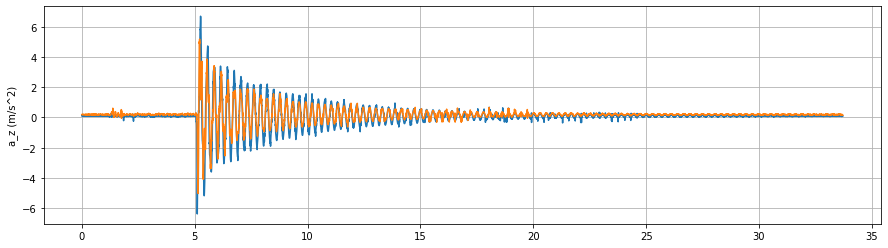

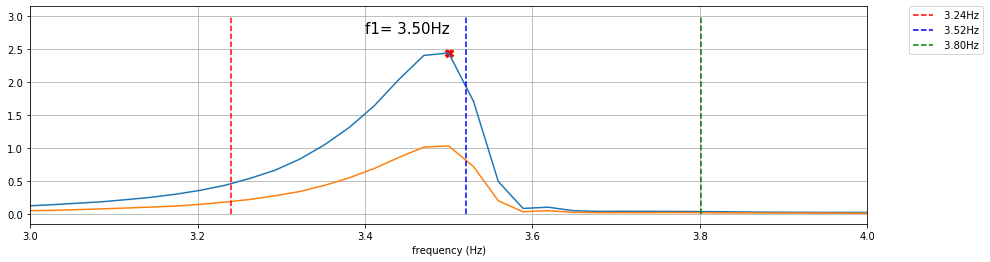

In [281]:
filename='leitura_excitador/2019-11-15__16-34-07'

with gz.open(filename+'.csv.gz', 'rb') as target:
    data =  np.genfromtxt(target, 
                          delimiter=',')
    ti   =  data[1:,0] - data[1,0]
    
a=MRPy.from_resampling(ti,10*(data[1:,1:]/8096))

az2   = MRPy(a[0], a.fs)
t    = a.t_axis()

az1   = MRPy(a[1], a.fs)
t    = a.t_axis()

plt.figure(4, figsize=(15, 4), clear=True)
plt.plot(t, az1[0])
plt.plot(t, az2[0])

#plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
#plt.ylim(-15, 15);
plt.ylabel('a_z (m/s^2)') 

plt.grid(True)

y = [0,3]
f_med = np.real(mi_f)*np.ones(2)
f_inf = (np.real(mi_f)-sigma_f)*np.ones(2)
f_sup = (np.real(mi_f)+sigma_f)*np.ones(2)



Saz11, fs11 = az1.periodogram()
f11         = az1.f_axis()

Saz22, fs22 = az2.periodogram()
f22         = az2.f_axis()

peaks, _ = find_peaks(Saz11[0], height=2)


plt.figure(5, figsize=(15, 4), clear=True)


plt.plot(f11, Saz11[0])
plt.plot(f22, Saz22[0])

plt.plot(f_inf, y,'r--', label='{0:5.2f}Hz'.format(np.real(mi_f)-sigma_f))
plt.plot(f_med, y,'b--', label='{0:5.2f}Hz'.format(np.real(mi_f)))
plt.plot(f_sup, y,'g--', label='{0:5.2f}Hz'.format(np.real(mi_f)+sigma_f))


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.scatter(f11[peaks], Saz11[0,peaks], marker='X', s=70, color='red')
plt.text(f11[peaks]-0.1, Saz11[0,peaks]+0.3, "f1={0:5.2f}Hz".format(3.49994516), fontsize=15)

plt.xlim(3, 4);   plt.xlabel('frequency (Hz)') 
#plt.ylim(0,  5);   plt.ylabel('S_az (power)') 

plt.grid(True) 

## 2. Funcionamento do Motor (servo)

Velocidade angular constante ($\phi$)

#### 2.1 Defini√ß√£o da Velocidade Angular ($\omega \phi$)  
20 medi√ß√µes com o transferidor (fazer um tranferidor de papel 360¬∞).  
Adotar um sleeptime que fa√ßa a posi√ß√£o final ser prox de 180¬∞

In [40]:
## Gera√ß√£o de sinal triangular

                    # Frequ√™ncia do sinal triangular (Hz)  
Td1 = 1/np.real(mi_f)
Td2 = 1/np.real(mi_f2)
Tt =  2                    # Tempo total de an√°lise

N1 = int(Tt/(Td1/50))                   # Discretiza√ß√£o do tempo
N2 = int(Tt/(Td2/50))


t1=np.linspace(0,Tt,N1+1)
t2=np.linspace(0,Tt,N2+1)

V = 600                     # Velocidade angular (graus/s)
D1 = V*(Td1/4)
D2 = V*(Td2/4)

triangle1 = signal.sawtooth(2*np.pi*fk[0]*(t1+Td1/4), 0.5)
triangle2 = signal.sawtooth(2*np.pi*fk[1]*(t2+Td2/4), 0.5)
ùúô1 = triangle1*D1                # Deslocamento Angular [graus] 
ùúô2 = triangle2*D2

Lh = 0.1
ux1 = Lh*np.sin(np.radians(ùúô1))
ux2 = Lh*np.sin(np.radians(ùúô2))


def derivative (f, t):
    f_d = np.zeros(f.size-1) 
    for i in range (f.size-1):
        f_d[i] = (f[i+1]-f[i])/h



v1=np.diff(ux1, n=1)/(t1[1])
a1=np.diff(v1, n=1)/(t1[1])

v2=np.diff(ux2, n=1)/(t2[1])
a2=np.diff(v2, n=1)/(t2[1])



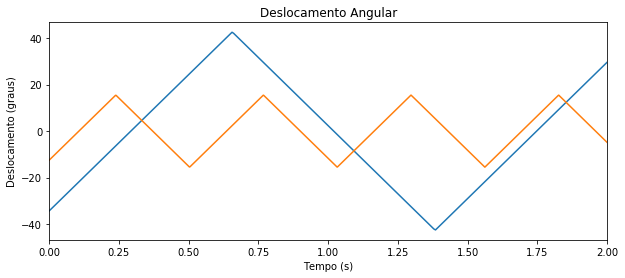

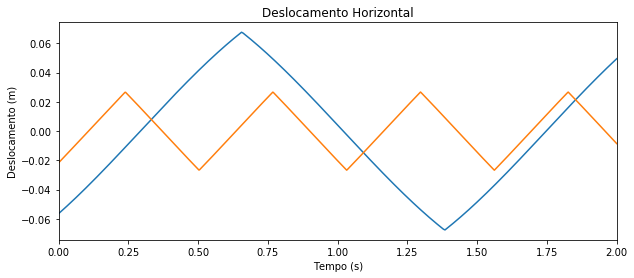

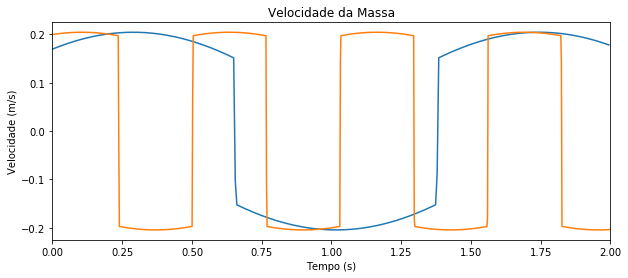

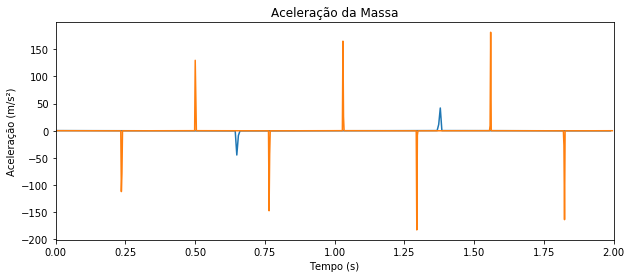

In [41]:
plt.figure(2, figsize=(10, 4), clear=True)
plt.plot(t1, ùúô1)
plt.plot(t2, ùúô2)
plt.title("Deslocamento Angular", )
plt.xlim(0, Tt);   plt.xlabel('Tempo (s)') 
plt.ylabel('Deslocamento (graus)')

plt.figure(3, figsize=(10, 4), clear=True)
plt.plot(t1, ux1)
plt.plot(t2, ux2)
plt.title("Deslocamento Horizontal", )
plt.xlim(0, Tt);   plt.xlabel('Tempo (s)') 
plt.ylabel('Deslocamento (m)')

plt.figure(4, figsize=(10, 4), clear=True)
plt.plot(t1[:-1], v1)
plt.plot(t2[:-1], v2)
plt.title("Velocidade da Massa")
plt.xlim(0, Tt);
plt.xlabel('Tempo (s)'); plt.ylabel('Velocidade (m/s)')

plt.figure(5, figsize=(10, 4), clear=True)
plt.plot(t1[:-2],a1)
plt.plot(t2[:-2],a2)
plt.title("Acelera√ß√£o da Massa")
plt.xlim(0, Tt);
plt.xlabel('Tempo (s)'); plt.ylabel('Acelera√ß√£o (m/s¬≤)');

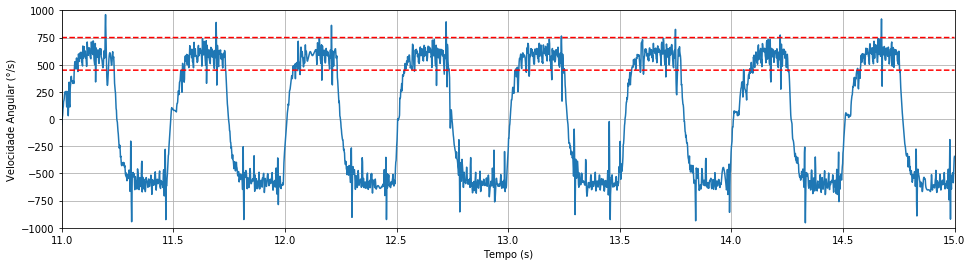

In [87]:
veloc_ang='leitura_excitador/2019-11-15__16-04-57'

with gz.open(veloc_ang+'.csv.gz', 'rb') as target:
    data =  np.genfromtxt(target, 
                          delimiter=',')
    ti   =  data[1:,0] - data[1,0]
    
a=MRPy.from_resampling(ti,(data[1:,1:])/32.8)

az   = MRPy(a[0], a.fs)
t    = a.t_axis()
lim_s = (600+150)*np.ones(np.size(t))
lim_i = (600-150)*np.ones(np.size(t))


plt.figure(4, figsize=(16, 4), clear=True)
plt.plot(t, az[0])
plt.plot(t, lim_s, 'r--')
plt.plot(t, lim_i, 'r--')

plt.xlim(11, 15);  plt.xlabel('Tempo (s)') 
plt.ylim(-1000, 1000);
plt.ylabel('Velocidade Angular (¬∞/s)') 

plt.grid(True) 


plt.grid(True)

In [96]:
n=0
for i in range (np.size(t)):
    if az[0,i]>=600-150:
        n+=1
V=np.ones(n)        
n=0
for i in range (np.size(t)):
    if az[0,i]>=600-150:
        V[n]=az[0,i]
        n+=1

mi_V = np.mean(V)
sigma_V = np.std(V)

print('---------------------------------------------------','\n',
      'Velocidade angular:                      {0:5.2f}¬∞'.format(mi_V),'\n',
      'Desvio padr√£o da velocidade angular       {0:5.2f}¬∞'.format(sigma_V),'\n',
      '---------------------------------------------------')

--------------------------------------------------- 
 Velocidade angular:                      591.39¬∞ 
 Desvio padr√£o da velocidade angular       69.48¬∞ 
 ---------------------------------------------------


## 3. Excita√ß√£o Harm√¥nica

In [132]:
n=100000
V = st.norm(mi_V,sigma_V)
vv = V.rvs(n)
f=np.zeros(n)

#Primeira freq de vibra√ß√£o
T = 1/fkr
A = mi_V*(T/4)
f1 = vv/(4*A[0])
f2 = vv/(4*A[1])

mi_f1 = np.mean(f1)
sigma_f1 = np.std(f1)

mi_f2 = np.mean(f2)
sigma_f2 = np.std(f2)

print('---------------------------------------------------','\n',
      'Primeira frequ√™ncia de vibra√ß√£o:          {0:5.2f}Hz'.format(mi_f1),'\n',
      'Desvio padr√£o da frequ√™ncia de vibra√ß√£o   {0:5.2f}Hz'.format(sigma_f1),'\n',
      'Ssegunda frequ√™ncia de vibra√ß√£o:          {0:5.2f}Hz'.format(mi_f2),'\n',
      'Desvio padr√£o da frequ√™ncia de vibra√ß√£o   {0:5.2f}Hz'.format(sigma_f2),'\n',
      '---------------------------------------------------')


--------------------------------------------------- 
 Primeira frequ√™ncia de vibra√ß√£o:           3.44Hz 
 Desvio padr√£o da frequ√™ncia de vibra√ß√£o    0.40Hz 
 Ssegunda frequ√™ncia de vibra√ß√£o:           9.44Hz 
 Desvio padr√£o da frequ√™ncia de vibra√ß√£o    1.10Hz 
 ---------------------------------------------------


## Fase 02 - Atenuador de massa

## Modelo 01 com atenuador de massa passivo

In [10]:
# System properties
f0 =  fk[0]                      # natural frequency (Hz)
k0 =  m1*(2*np.pi*f0)**2         # system stiffness (N/m)
zt =  0.01                       # same damping ratio for all

# Damper design
mD =  (m1+m2)*0.04                        # damper mass 4% of total (kg)
mr =  mD/(m1+m2)
sm =  np.sqrt(mr)

fr = (np.sqrt(1 - mr/2)/(1 + mr) + np.sqrt(1 - 2*zt*zt) - 1) \
       - (2.375 -  1.034*sm -  0.426*mr)*zt*sm \
       - (3.730 - 16.903*sm + 20.496*mr)*zt*zt*sm

fD =  1.00*fr*f0                 # Tsai and Lin (1993) - increase to test!!!
kD =  mD*(2*np.pi*fD)**2         # tuned damper stiffness (N/m)

print('Ideal damper frequency: {0:5.2f}Hz'.format(fD))
print (fk[0])
print(mD)

Ideal damper frequency:  3.26Hz
3.4377493617522488
0.009386736800000002


In [11]:
# Matriz de rigidez do amortecedor
KD = np.array([[    kD, -kD ],    # stiffness matrix
               [   -kD,  kD ]])

n=1                                                      #Grau de liberdade onde o amortecedor ser√° inserido
K2=np.insert(np.insert(K, n, 0, axis=1), n, 0, axis=0)  #Inserir uma linha e uma coluna de zeros (matriz de ordem 12)
M2=np.insert(np.insert(M, n, 0, axis=1), n, 0, axis=0)

for i in range (2):                                      #Adi√ß√£o da matriz KD em K2
    for j in range (2):
        K2[n+j][n+i]+=KD[j][i]

M2[n][n]=mD                                              #Adi√ß√£o da massa da mola em M2


print ("Matriz de rigidez do amortecedor\n", KD,"\n")
print ("Matriz de rigidez do modelo\n", K2,"\n")
print ("Matriz de massa do modelo\n", M2,"\n")

Matriz de rigidez do amortecedor
 [[ 3.93128293 -3.93128293]
 [-3.93128293  3.93128293]] 

Matriz de rigidez do modelo
 [[ 149.765625      0.         -149.765625  ]
 [   0.            3.93128293   -3.93128293]
 [-149.765625     -3.93128293  303.46253293]] 

Matriz de massa do modelo
 [[0.12880952 0.         0.        ]
 [0.         0.00938674 0.        ]
 [0.         0.         0.1058589 ]] 



In [12]:
# Uses scipy to solve the standard eigenvalue problem
w2, Phi2 = sc.eig(K2, M2)

# Ensure ascending order of eigenvalues
iw  = w2.argsort()
w2  = w2[iw]
Phi2 = Phi2[:,iw]

# Eigenvalues to vibration frequencies
wk2  = np.sqrt(np.real(w2)) 
fk2  = wk2/2/np.pi

print('First vibration mode:  {0:5.2f}Hz, [{1:6.3f} {2:6.3f} {3:6.3f}]'.format(fk2[0], *Phi2[:,0]))
print('Second vibration mode: {0:5.2f}Hz, [{1:6.3f} {2:6.3f} {3:6.3f}]'.format(fk2[1], *Phi2[:,1]))
print('Third vibration mode: {0:5.2f}Hz,  [{1:6.3f} {2:6.3f} {3:6.3f}]'.format(fk2[2], *Phi2[:,2]))

First vibration mode:   3.10Hz, [-0.140 -0.986 -0.094]
Second vibration mode:  3.60Hz, [ 0.358 -0.912  0.201]
Third vibration mode:  9.49Hz,  [ 0.434  0.119 -0.893]


In [13]:
Mk2 = np.diag(np.dot(Phi2.T, np.dot(M2, Phi2)))
print('First mode modal mass is:  {0:7.2f}kg'.format(Mk2[0]))
print('Second mode modal mass is: {0:7.2f}kg'.format(Mk2[1]))
print('Third mode modal mass is: {0:7.2f}kg'.format(Mk2[2]))

First mode modal mass is:     0.01kg
Second mode modal mass is:    0.03kg
Third mode modal mass is:    0.11kg


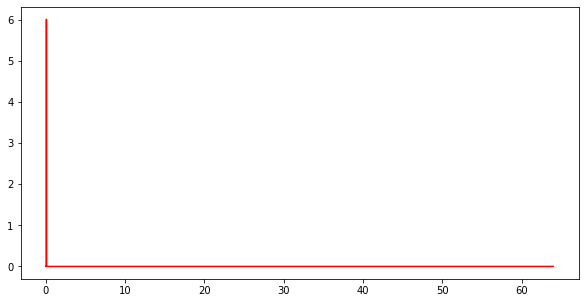

In [14]:
Td =  64.                          # time discretization parameters
N  =  10240
fs =  N/Td

F0 =  0.1*k0                      # quasi-static response is 1cm
t  =  np.linspace(0, Td, N)        # time domain
s  =  np.sin(2*np.pi*fk[0]*t)      # sine wave ressonant with 1st mode
F = [F0*signal.unit_impulse(N, 10), np.zeros(s.shape), np.zeros(s.shape)]

# Modal force as MRPy object
Fk =  MRPy(np.dot(Phi2.T, F), fs=fs)

# Normalize by modal masses:
for k in range(2):
    Fk[k,:] /= Mk2[k]

    
plt.figure(1, figsize=(10, 5), clear=True)
plt.plot(t, F[0],"r");


R.M.S. displacement of system mass:  1.074mm
R.M.S. displacement of damper:       3.862mm
R.M.S. displacement of system mass:  0.624mm


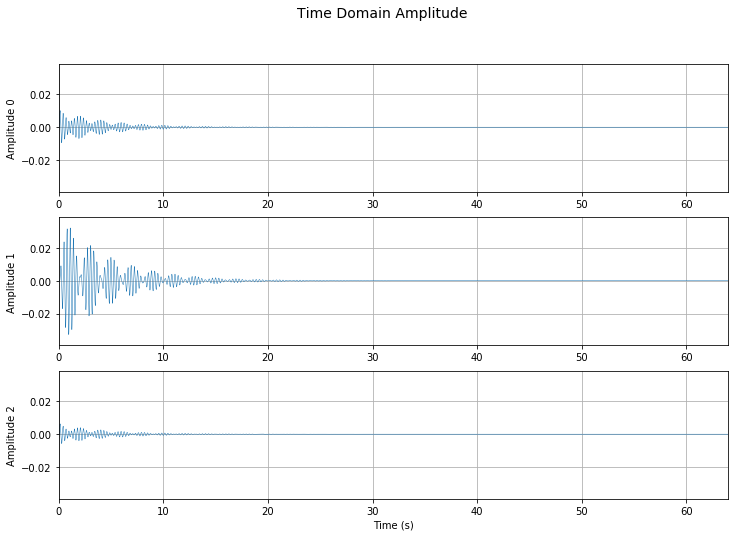

In [15]:
uk =  Fk.sdof_Duhamel(fk2, zt)           # solve by Duhamel
ut =  MRPy(np.dot(Phi2, uk), fs=uk.fs)   # back from modal space

ut.plot_time();


print('R.M.S. displacement of system mass: {0:6.3f}mm'.format(ut[0].std()*1000))
print('R.M.S. displacement of damper:      {0:6.3f}mm'.format(ut[1].std()*1000))
print('R.M.S. displacement of system mass: {0:6.3f}mm'.format(ut[2].std()*1000))


## Fase 02 - Active Mass Damper

### Tentativa 01  

$$m_1\ddot{x_1}(t)+c_1\dot{x_1}(t)+k_1x_1(t)=f(t)-u(t)$$  
$$m_2\ddot{x_2}(t)=u(t)$$

Para o modelo reduzido de 2 GDL

In [16]:
## Gera√ß√£o de sinal triangular

# Discretiza√ß√£o do tempo
N = 42100
tm = 1/fk[0]
Td =  N*tm/1000
t=np.linspace(0,Td,N+1)
fs =  N/Td
zt=0.01

triangle = signal.sawtooth(2*np.pi*fk[0]*t, 0.5)
u=triangle                # Amplitude em Deslocamento [m] 
u=u[80:]
t=t[:-80]


e = 2.718281
dec = e**(-zt*wk[0]*t)
u2 = u*dec

v2=np.diff(u2, n=1)
a2=np.diff(u2, n=2)

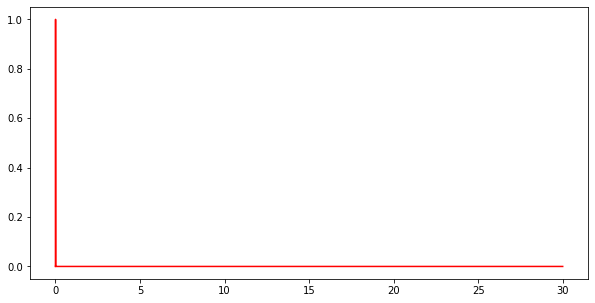

In [17]:
Td =  30.                          # time discretization parameters
N  =  42019
fs =  N/Td

F0 =  1                      # quasi-static response is 1cm
t  =  np.linspace(0, Td, N)        # time domain
s  =  np.sin(2*np.pi*fk[0]*t)      # sine wave ressonant with 1st mode
f = signal.unit_impulse(N, 10)
F = [F0*f, np.zeros(s.shape)]

# Modal force as MRPy object
Fk =  MRPy(np.dot(Phi.T, F), fs=fs)

# Normalize by modal masses:
for k in range(2):
    Fk[k,:] /= Mk[k]
    
plt.figure(1, figsize=(10, 5), clear=True)
plt.plot(t, f,"r");


R.M.S. displacement of system mass:  0.039mm
R.M.S. displacement of system mass:  0.024mm


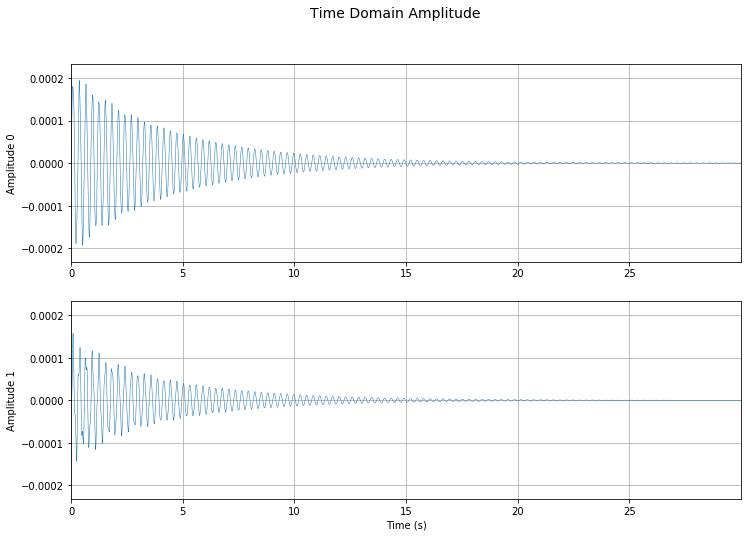

In [18]:
uk =  Fk.sdof_Duhamel(fk, zt)           # solve by Duhamel
ut =  MRPy(np.dot(Phi, uk), fs=uk.fs)   # back from modal space

ut.plot_time();


print('R.M.S. displacement of system mass: {0:6.3f}mm'.format(ut[0].std()*1000))
print('R.M.S. displacement of system mass: {0:6.3f}mm'.format(ut[1].std()*1000))

In [19]:
## Gera√ß√£o de sinal triangular

# Discretiza√ß√£o do tempo
N = 42100
tm = 1/fk[0]
Td =  N*tm/1000
t=np.linspace(0,Td,N+1)
fs =  N/Td
zt=0.01

triangle = signal.sawtooth(2*np.pi*fk[0]*t, 0.5)
u=triangle*D                # Amplitude em Deslocamento [m] 
u=u[80:]
t=t[:-80]


e = 2.718281
dec = e**(-zt*wk[0]*t)
u2 = u*dec

v2=np.diff(u2, n=1)
a2=np.diff(u2, n=2)





plt.figure(1, figsize=(10, 5), clear=True)
plt.plot(t, dec,"r");
print (fk[0])
print (u)

NameError: name 'D' is not defined

In [ ]:
plt.figure(2, figsize=(12, 4), clear=True)
plt.plot(t, u2)
plt.title("Deslocamento da Massa", )
plt.xlim(-.01, 10);   plt.xlabel('Tempo (s)') 
plt.ylabel('Deslocamento (m)')

plt.figure(3, figsize=(12, 4), clear=True)
plt.plot(t[:-1], v2)
plt.title("Velocidade da Massa")
plt.xlim(0, 10);
plt.xlabel('Tempo (s)'); plt.ylabel('Velocidade (m/s)')

plt.figure(4, figsize=(10, 4), clear=True)
plt.plot(t[:-2],a2)
plt.title("Acelera√ß√£o da Massa")
plt.xlim(-.1, 10);
plt.xlabel('Tempo (s)'); plt.ylabel('Acelera√ß√£o (m/s¬≤)');
print (len(u))

In [ ]:

N  = 42021                  # length of time series
T  = Td                  # series total duration
f0 = 100                   # sine/cosine frequency (in Hertz)

k  = np.arange(0, N)   # required for f_k calculation
ti = k*T/N               # discrete time domain
fk = k/T                 # discrete frequency domain

ci = np.cos(2*np.pi*f0*ti)
Ck = np.fft.fft(a)


print (len(fk), len(Ck.real))
plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(ti[:-2], a)
#plt.xlim( 0, T);  
plt.xlabel('time (s)') 
#plt.ylim(-2, 2);  
plt.ylabel('f(t)') 
plt.grid(True) 

plt.figure(3, figsize=(8, 6), clear=True)

plt.subplot(2,1,1)
plt.plot(fk[:-2], Ck.real)
plt.xlim( 2.5, 3);  
plt.xlabel('frequency (Hz)')
#plt.ylim(-N, N  );
plt.ylabel('Real(F_k)') 
plt.grid(True)

In [ ]:
f = 2
Tm = 1/f
n = int(Tm/0.001)
t = np.linspace(0, Tm, n)
a = np.sin(2*np.pi*f*t)

plt.figure(3, figsize=(8, 6), clear=True)
plt.plot(t, a);